In [1]:
import hub
from hub.schema import ClassLabel, Image, Tensor
from hub import Dataset, transform, schema
from GoodVibrations import audio2image
import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tag = "mynameisvinn/spectrograms"
ds = hub.Dataset(tag)
type(ds)

hub.api.dataset.Dataset

In [4]:
new_schema = {
    "image": Image(shape=(24, 24), dtype="uint8"),
    "label": ClassLabel(num_classes=10)
}

@transform(schema=new_schema)
def load_transform(sample):
    image = cv2.resize(sample['image'].compute(), dsize=(24, 24), interpolation=cv2.INTER_CUBIC)
    label = int(sample['label'].compute())
    
    return {
        "image": image,
        "label": label
    }

In [5]:
ds2 = load_transform(ds)  # transform object
type(ds2)

hub.compute.transform.Transform

In [6]:
tag = "mynameisvinn/result"
ds3 = ds2.store(tag)
type(ds3)

Computing the transormation: 9.61k items [03:52, 41.4 items/s]               


hub.api.dataset.Dataset

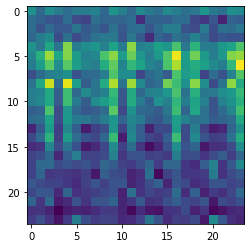

In [16]:
img = ds3["image", 3].compute()
plt.imshow(img)